In [95]:
import numpy as np
import pandas as pd

#read the input file
GDP=pd.read_csv("ab40c054-5031-4376-b52e-9813e776f65e.csv", encoding = "ISO-8859-1")


In [96]:
display(GDP)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [4]:
#As per the requirement, remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
GDP = GDP.drop([5,10],axis='rows')

KeyError: '[ 5 10] not found in axis'

In [5]:
#Data Cleaning
#To check for empty columns
GDP.isnull().all(axis=0)

Items  Description           False
Duration                     False
Andhra Pradesh               False
Arunachal Pradesh            False
Assam                        False
Bihar                        False
Chhattisgarh                 False
Goa                          False
Gujarat                      False
Haryana                      False
Himachal Pradesh             False
Jammu & Kashmir              False
Jharkhand                    False
Karnataka                    False
Kerala                       False
Madhya Pradesh               False
Maharashtra                  False
Manipur                      False
Meghalaya                    False
Mizoram                      False
Nagaland                     False
Odisha                       False
Punjab                       False
Rajasthan                    False
Sikkim                       False
Tamil Nadu                   False
Telangana                    False
Tripura                      False
Uttar Pradesh       

In [6]:
# delete empty column 'West Bengal1'
GDP = GDP.drop(['West Bengal1'],axis=1)

In [7]:
#To check for empty rows
GDP.isnull().all(axis=1)

0    False
1    False
2    False
3    False
4    False
6    False
7    False
8    False
9    False
dtype: bool

In [8]:
#To count missing values in each row
GDP.isnull().sum(axis=1)

0    0
1    0
2    0
3    0
4    9
6    0
7    0
8    0
9    9
dtype: int64

In [11]:
#replace (NaN) missing values by previous year values
GDP=GDP.ffill(axis=0)

In [12]:
display(GDP.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 9
Data columns (total 35 columns):
Items  Description           9 non-null object
Duration                     9 non-null object
Andhra Pradesh               9 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 9 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      9 non-null float64
Himachal Pradesh             9 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               9 non-null float64
Maharashtra                  9 non-null float64
Manipur                      9 non-null float64
Meghalaya                    9 non-nu

None

In [13]:
display(GDP)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,29667.00,1153795.00,184091.00,5721.00,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,15.92,10.58,13.65,10.89,8.84,12.09,10.15,9.99


In [16]:
#Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'
# slicing the data for required 3 years of '%growth rate'
growth_rate = GDP[6:][:]

In [17]:
display(growth_rate)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,15.92,10.58,13.65,10.89,8.84,12.09,10.15,9.99


In [18]:
#dropping the not required columns for calculation of average growth
growth_rate=growth_rate.drop(['Items  Description', 'Duration','All_India GDP'],axis=1)

In [19]:
display(growth_rate)

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
7,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.35,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87
8,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,9.72,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14
9,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,10.14,17.91,...,9.39,10.99,12.61,15.92,10.58,13.65,10.89,8.84,12.09,10.15


In [20]:
#calculation of average growth for requested 3 yrs
avg_growth_rate = []
avg_growth_rate = growth_rate.mean(axis=0)

In [21]:
display(avg_growth_rate)
display(type(avg_growth_rate))

Andhra Pradesh               14.033333
Arunachal Pradesh            14.413333
Assam                        12.650000
Bihar                        13.603333
Chhattisgarh                 13.703333
Goa                           6.033333
Gujarat                      11.126667
Haryana                      11.846667
Himachal Pradesh             11.566667
Jammu & Kashmir              10.900000
Jharkhand                    11.500000
Karnataka                    14.120000
Kerala                       12.583333
Madhya Pradesh               12.626667
Maharashtra                  10.433333
Manipur                      13.536667
Meghalaya                     6.953333
Mizoram                      15.900000
Nagaland                     14.560000
Odisha                        9.836667
Punjab                       10.773333
Rajasthan                    11.336667
Sikkim                       10.486667
Tamil Nadu                   12.336667
Telangana                    12.763333
Tripura                  

pandas.core.series.Series

In [22]:
# import matplotlib library to plot graphs
%matplotlib inline

In [23]:
# Code to increase the graph size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]

In [27]:
#sort the growth rate in descending order 
avg_growth_rate = avg_growth_rate.sort_values(ascending=False)
display(avg_growth_rate)

Tripura                      16.660000
Mizoram                      15.900000
Nagaland                     14.560000
Arunachal Pradesh            14.413333
Karnataka                    14.120000
Andhra Pradesh               14.033333
Chhattisgarh                 13.703333
Bihar                        13.603333
Manipur                      13.536667
Andaman & Nicobar Islands    12.820000
Telangana                    12.763333
Assam                        12.650000
Madhya Pradesh               12.626667
Kerala                       12.583333
Tamil Nadu                   12.336667
Delhi                        12.160000
Puducherry                   12.053333
Chandigarh                   11.960000
Uttar Pradesh                11.940000
Haryana                      11.846667
Uttarakhand                  11.803333
Himachal Pradesh             11.566667
Jharkhand                    11.500000
Rajasthan                    11.336667
Gujarat                      11.126667
Jammu & Kashmir          

Text(0, 0.5, '% Growth Rate')

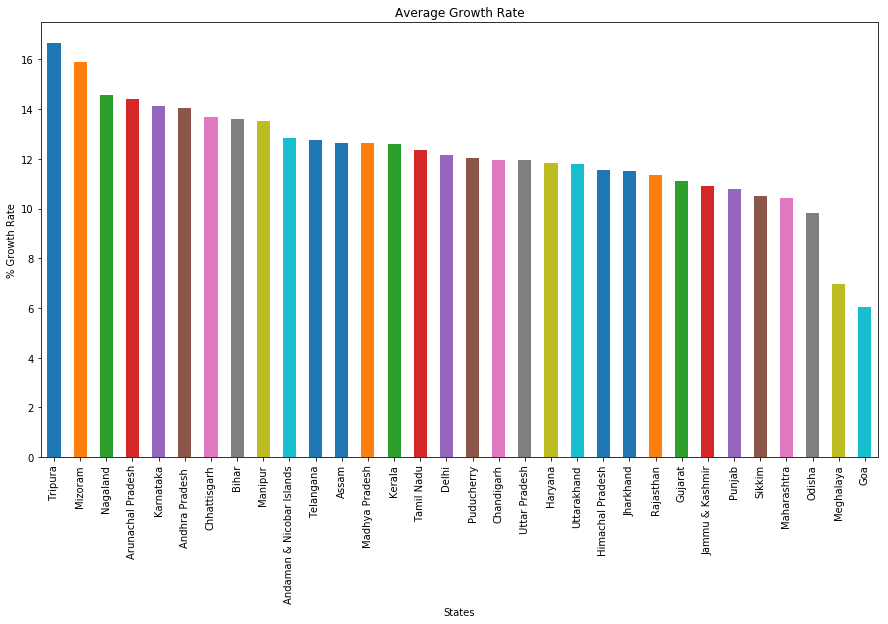

In [26]:
#Plot the bar graph to dipict the average growth rate of various states
avg_growth_rate.plot.bar()
plt.title("Average Growth Rate")
plt.xlabel("States")
plt.ylabel("% Growth Rate")

In [28]:
#Curiosity exercise - what has been the average growth rate of your home state, and how does it compare to the national average over this duration?
#slicing the data for required 3 years of '%growth rate'
growth_rate_mystate = GDP[6:][:]

In [29]:
#Selecting columns "Karnataka" (my state) and "All_India GDP"
growth_rate_mystate = growth_rate_mystate[["Karnataka","All_India GDP"]]

In [30]:
display(growth_rate_mystate)

,Karnataka,All_India GDP
7,18.24,12.97
8,12.70,10.65
9,11.42,9.99


In [31]:
#calculation of average growth for requested 3 yrs
avg_growth_rate_mystate = []
avg_growth_rate_mystate = growth_rate_mystate.mean(axis=0)

In [32]:
display(avg_growth_rate_mystate)
display(type(avg_growth_rate_mystate))

Karnataka        14.120000
All_India GDP    11.203333
dtype: float64

pandas.core.series.Series

Text(0, 0.5, '% Growth Rate')

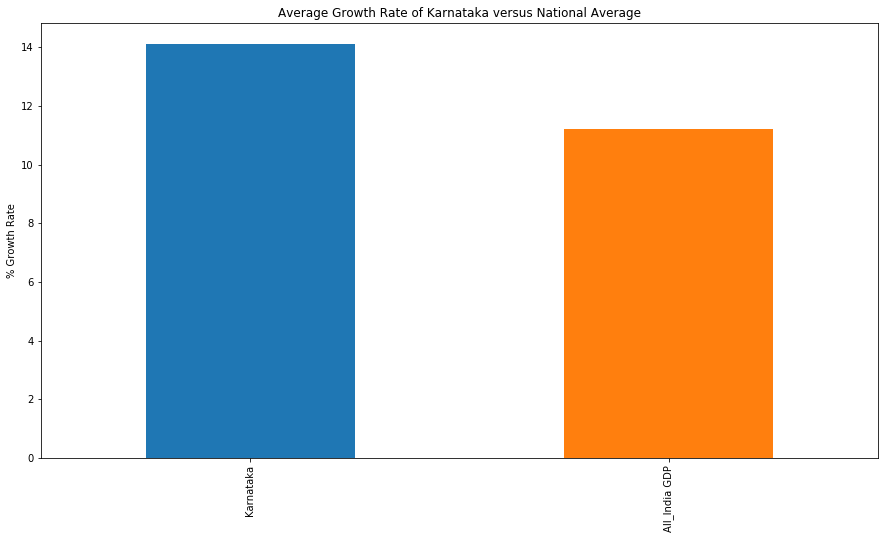

In [33]:
#Plot the bar graph to dipict the average growth rate of my State versus National average
avg_growth_rate_mystate.plot.bar()
plt.title("Average Growth Rate of Karnataka versus National Average")
plt.ylabel("% Growth Rate")

In [35]:
#Plot the total GDP of the states for the year 2015-16:
#Slicing the data for GDP 2015-2016
GDP_2015_16 = (GDP[4:5][:])

In [36]:
#dropping the not required columns to plot GDP for 2015-16
GDP_2015_2016 = GDP_2015_16.drop(['Items  Description', 'Duration','All_India GDP'],axis=1)

In [67]:
#calculation of Total GDP (to covert DF to Series, for plotting graph)
Total_GDP_2015_16 = []
Total_GDP_2015_16 = GDP_2015_2016.sum(axis=0)

In [68]:
Total_GDP_2015_16 = Total_GDP_2015_16.sort_values(ascending=False)
display(Total_GDP_2015_16)

Maharashtra                  1792122.0
Tamil Nadu                   1212668.0
Uttar Pradesh                1153795.0
Karnataka                    1027068.0
Gujarat                       994316.0
Rajasthan                     612194.0
Andhra Pradesh                609934.0
Kerala                        588337.0
Telangana                     575631.0
Delhi                         551963.0
Madhya Pradesh                543975.0
Haryana                       485184.0
Bihar                         413503.0
Punjab                        368011.0
Odisha                        341887.0
Chhattisgarh                  260776.0
Jharkhand                     241955.0
Assam                         224234.0
Uttarakhand                   184091.0
Jammu & Kashmir               118387.0
Himachal Pradesh              104369.0
Goa                            45002.0
Chandigarh                     30304.0
Tripura                        29667.0
Meghalaya                      26745.0
Puducherry               

Text(0, 0.5, 'Total GDP')

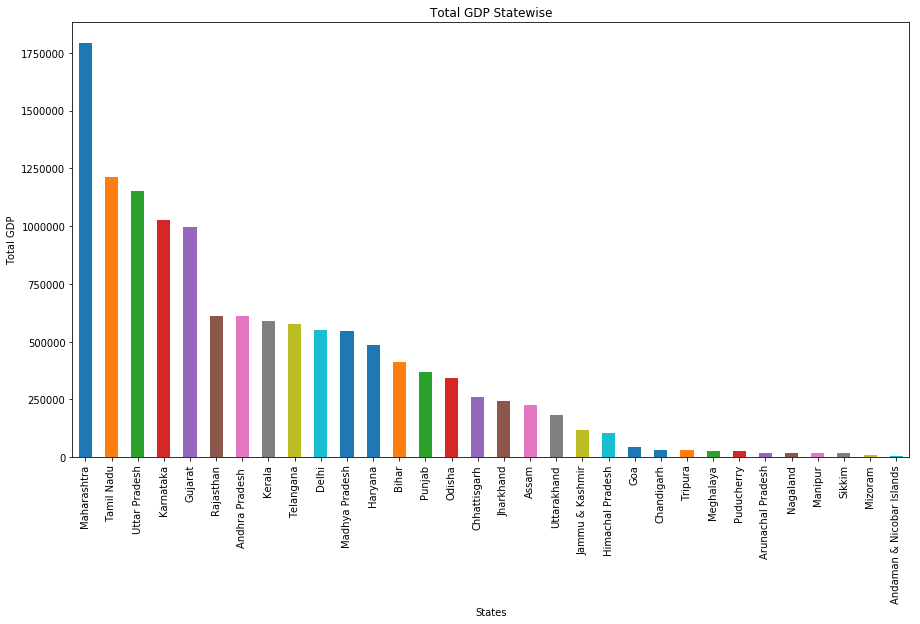

In [40]:
#Plot the bar graph to dipict the Total GDP of various states
Total_GDP_2015_2016.plot.bar()
plt.title("Total GDP Statewise")
plt.xlabel("States")
plt.ylabel("Total GDP")

In [41]:
#Part I - B
import os
cwd = os.getcwd()
display(cwd)

'C:\\Users\\Prathima\\Documents\\Prathi\\Projects\\DataScience\\Course 2 - Statistics and EDA\\Assignment _GDP Analysis\\A'

In [43]:
dir1 = os.listdir(cwd)
df_lst = []
# Loop to read 27 GSVA input csv files 
for file in dir1:
    if file.find('GSVA')>0 and file.find('.csv')>0 :
        temp1_df = pd.read_csv((file),encoding = "ISO-8859-1")
        temp1_df = temp1_df.loc[::,['S.No.','Item','2014-15']]
        temp1_df['State'] = file.split('-')[1]
        df_lst.append(temp1_df)
combined_df = pd.concat(df_lst)
display(combined_df)

,S.No.,Item,2014-15,State
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh
1,1.1,Crops,7893514.0,Andhra_Pradesh
2,1.2,Livestock,4309078.0,Andhra_Pradesh
3,1.3,Forestry and logging,346160.0,Andhra_Pradesh
4,1.4,Fishing and aquaculture,2270664.0,Andhra_Pradesh
5,2,Mining and quarrying,1484300.0,Andhra_Pradesh
6,Total,Primary,16303716.0,Andhra_Pradesh
7,3,Manufacturing,4672266.0,Andhra_Pradesh
8,4,"Electricity, gas, water supply & other utility...",1151729.0,Andhra_Pradesh
9,5,Construction,4664889.0,Andhra_Pradesh


In [44]:
# Plot the GDP per capita for all the states.
#retrieve the GDP Per Capita rows from the combined df

gdp_per_capita_df = combined_df[combined_df['Item'].str.contains("Per Capita GSDP ")]

In [60]:
#dropping the not required columns to plot GDP per capita 
gdp_per_capita_df_plot = gdp_per_capita_df.drop(['S.No.', 'Item'],axis=1)

In [62]:
gdp_per_capita_df_plot = gdp_per_capita_df_plot.sort_values(by=['2014-15'],ascending=False)


In [65]:
gdp_per_capita_df_plot1 = gdp_per_capita_df_plot.set_index('State')
display(gdp_per_capita_df_plot1)


,2014-15
State,
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttarakhand,153076.0
Maharashtra,152853.0
Himachal_Pradesh,147330.0
Tamil_Nadu,146503.0
Karnataka,145141.0


Text(0, 0.5, 'GDP Per Capita in Rs')

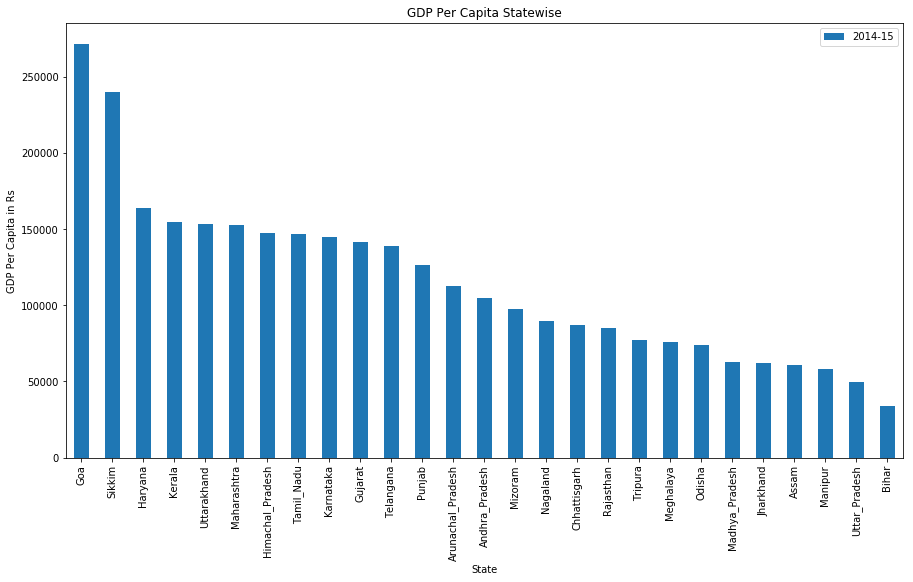

In [66]:
gdp_per_capita_df_plot1.plot.bar()
plt.title("GDP Per Capita Statewise")
plt.ylabel("GDP Per Capita in Rs")

In [72]:
# Identify the top-5 and the bottom-5 states based on GDP per capita.
# Top 5 states are 
gdp_per_capita_df_plot1.head()


,2014-15
State,
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttarakhand,153076.0


In [71]:
#Bottom 5 states are 
gdp_per_capita_df_plot1.tail()

,2014-15
State,
Jharkhand,62091.0
Assam,60621.0
Manipur,58442.0
Uttar_Pradesh,49450.0
Bihar,33954.0


In [82]:
#Find the ratio of highest per capita GDP to the lowest per capita GDP.
ratio = (gdp_per_capita_df_plot1.iloc[0])/(gdp_per_capita_df_plot1.iloc[-1])

In [83]:
display(ratio)

2014-15    8.004742
dtype: float64

In [93]:
# Categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest)
gdp_per_capita_df_cat = gdp_per_capita_df_plot
gdp_per_capita_df_cat.columns = ['GDPperCAP','State']
display(gdp_per_capita_df_cat)

,GDPperCAP,State
32,271793.0,Goa
32,240274.0,Sikkim
32,164077.0,Haryana
32,154778.0,Kerala
32,153076.0,Uttarakhand
32,152853.0,Maharashtra
32,147330.0,Himachal_Pradesh
32,146503.0,Tamil_Nadu
32,145141.0,Karnataka
32,141263.0,Gujarat


In [97]:
#To Calcuate quartile values
gdp_per_capita_df_cat.GDPperCAP.quantile([0.20,0.5,0.85,1])

0.20     65187.0
0.50    104977.0
0.85    153246.2
1.00    271793.0
Name: GDPperCAP, dtype: float64